In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [2]:
obj_list = ['MT2', 'MX2', 'APFL2']
dataset_list = ['MNIST', 'KMNIST', 'FMNIST']
optim_list = ['LocalSGD', 'CD', 'CDVR']

loss_results = []
for obj in obj_list:
    loss1 = []
    for dataset in dataset_list:
        loss2 = []
        for optim in optim_list:
            file_name = 'loss_' + obj + '_' + dataset + '_' + optim
            result_path = './result/' + file_name + '.txt'
            with open(result_path, "rb") as f:
                loss = pickle.load(f)
                loss2.append(loss)
        loss1.append(loss2)
    loss_results.append(loss1)

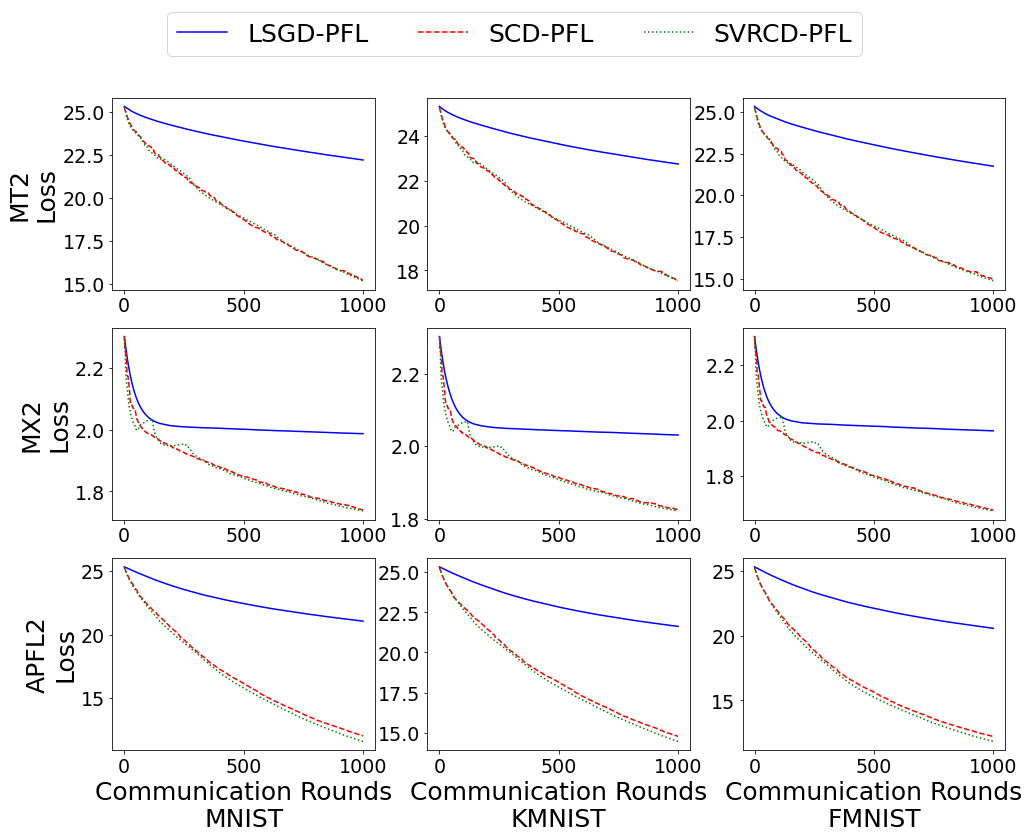

In [4]:
fig, axes = plt.subplots(3, 3, figsize=[16., 12.])

for i, obj in enumerate(obj_list):
    for j, dataset in enumerate(dataset_list):
        axes[i, j].plot(loss_results[i][j][0], color='b', linestyle='-', label='LSGD-PFL')
        axes[i, j].plot(loss_results[i][j][1], color='r', linestyle='--', label='SCD-PFL')
        axes[i, j].plot(loss_results[i][j][2], color='g', linestyle=':', label='SVRCD-PFL')
        axes[i, j].tick_params(axis='both', which='major', labelsize=19)
        if j == 0:
            axes[i, j].set_ylabel(obj + '\nLoss', fontsize=25)
        if i == 2:
            axes[i, j].set_xlabel('Communication Rounds\n' + dataset, fontsize=25)

fig.legend(labels=['LSGD-PFL', 'SCD-PFL', 'SVRCD-PFL'], loc='upper center', ncol=3, fontsize=25)

plt.savefig('experiment1_1.png', dpi=400, bbox_inches='tight')

plt.show()